# Problem z optymalną produkcją okien

### W 3 fabrykach produkowane są dwa typy okien - drewniane i aluminiowe. Fabryka 1 produkuje tylko okna aluminiowe, Fabryka 2 tylko okna drewniane, a Fabryka 3 oba typy okien. Wydajność fabryk i ich dostępność jest dostępna w tabeli. 
### Naszym zadaniem jest podzielenie produkcji na poszczególne fabryki tak, aby nasze zyski były jak największe.

## Tabela:
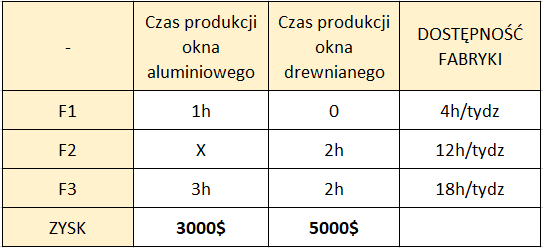

In [1]:
from pulp import *

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, FloatSlider, IntSlider
import ipywidgets as widgets
import pandas as pd

style = {'description_width': 'initial'}


cena_X1_slider = IntSlider(min=0,max = 20000, value= 3000 , description="cena_X1_slider", style= style )
cena_X2_slider = IntSlider(min=0,max = 20000,value= 5000, description="cena_X2_slider", style= style )
ilosc_x1_F1_slider = IntSlider(min=0,max = 10, value= 1, description="ilosc_x1_F1_slider", style= style )
ilosc_x2_F1_slider = IntSlider(min=0,max = 10, value= 0, description="ilosc_x2_F1_slider", style= style )
ilosc_x1_F2_slider = IntSlider(min=0,max = 10,value= 0, description="ilosc_x1_F2_slider", style= style )
ilosc_x2_F2_slider = IntSlider(min=0,max = 10,value= 2, description="ilosc_x2_F2_slider", style= style )
ilosc_x1_F3_slider = IntSlider(min=0,max = 10,value= 3, description="ilosc_x1_F3_slider", style= style )
ilosc_x2_F3_slider = IntSlider(min=0,max = 10,value= 2, description="ilosc_x2_F3_slider", style= style )
liczba_godzin_F1_slider = IntSlider(min=0,max = 25,value= 4, description="liczba_godzin_F1_slider", style= style )
liczba_godzin_F2_slider = IntSlider(min=0,max = 25,value= 12, description="liczba_godzin_F2_slider", style= style )
liczba_godzin_F3_slider = IntSlider(min=0,max = 25,value= 18, description="liczba_godzin_F3_slider", style= style )

def Produkcja_okien(cena_X1=3000,
    cena_X2 = 5000,
    ilosc_x1_F1 = 1,
    ilosc_x2_F1 = 0,
    ilosc_x1_F2 = 0,
    ilosc_x2_F2 = 2,
    ilosc_x1_F3 = 3,
    ilosc_x2_F3 = 2,
    liczba_godzin_F1 = 4,
    liczba_godzin_F2 = 12,
    liczba_godzin_F3 = 18):

    prob = LpProblem("Problem okien 2", LpMaximize)
    x1=LpVariable("Ilość pakietów okien aluminiowych",0)
    x2=LpVariable("Ilość pakietów okien drewnianych",0)
    prob += cena_X1*x1 + cena_X2*x2, "Zysk"

    prob += ilosc_x1_F1*x1 + ilosc_x2_F1*x2 <= liczba_godzin_F1, "F1"
    prob += ilosc_x1_F2*x1 + ilosc_x2_F2*x2 <= liczba_godzin_F2, "F2"
    prob += ilosc_x1_F3*x1 + ilosc_x2_F3*x2 <= liczba_godzin_F3, "F3"

    prob.writeLP("okna2.lp")
    prob.solve()
    
    print("Status:", LpStatus[prob.status])

    for v in prob.variables():
        print(v.name,"=",v.varValue)

    print("Zysk wyniesie {} zł  ".format( value(prob.objective)))
    
    
    shadows = [{'name':name, 'shadow price': c.pi, "slack": c.slack} for name, c in prob.constraints.items()]
    print("*"*10+"Shadow Prices"+"*"*10)
    print(pd.DataFrame(shadows))
    
interact(Produkcja_okien,cena_X1 = cena_X1_slider,
    cena_X2 =    cena_X2_slider,
    ilosc_x1_F1 =    ilosc_x1_F1_slider,
    ilosc_x2_F1 =ilosc_x2_F1_slider,
    ilosc_x1_F2 =ilosc_x1_F2_slider,
    ilosc_x2_F2 =ilosc_x2_F2_slider,
    ilosc_x1_F3 =ilosc_x1_F3_slider,
    ilosc_x2_F3 =ilosc_x2_F3_slider,
    liczba_godzin_F1 =liczba_godzin_F1_slider,
    liczba_godzin_F2 =liczba_godzin_F2_slider,
    liczba_godzin_F3 =liczba_godzin_F3_slider)

interactive(children=(IntSlider(value=3000, description='cena_X1_slider', max=20000, style=SliderStyle(descrip…

<function __main__.Produkcja_okien(cena_X1=3000, cena_X2=5000, ilosc_x1_F1=1, ilosc_x2_F1=0, ilosc_x1_F2=0, ilosc_x2_F2=2, ilosc_x1_F3=3, ilosc_x2_F3=2, liczba_godzin_F1=4, liczba_godzin_F2=12, liczba_godzin_F3=18)>